In [1]:
!wget https://github.com/a-forty-two/diamler_17_jan/blob/main/Sample-Superstore.xls?raw=true
!cp Sample-Superstore.xls?raw=true superstore.xls
!ls

--2022-04-07 11:58:37--  https://github.com/a-forty-two/diamler_17_jan/blob/main/Sample-Superstore.xls?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/a-forty-two/diamler_17_jan/raw/main/Sample-Superstore.xls [following]
--2022-04-07 11:58:37--  https://github.com/a-forty-two/diamler_17_jan/raw/main/Sample-Superstore.xls
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/a-forty-two/diamler_17_jan/main/Sample-Superstore.xls [following]
--2022-04-07 11:58:37--  https://raw.githubusercontent.com/a-forty-two/diamler_17_jan/main/Sample-Superstore.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185

In [2]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

     |████████████████████████████████| 9.9 MB 10.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
     |████████████████████████████████| 96 kB 3.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
import pandas as pd
df = pd.read_excel('superstore.xls')
df.head()
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df.head(2)
# WHENEVER you're into TS analysis -> TIMESTAMPS 
# what if you don't have time stamps but data is arranged in either time-ascending or descending order,
# you can always take a reference timeline -> 1990-2000 
# TIMESTAMP should work like an INDEX and not input dataset 
# TSA -> Univariate and multivariate 
# ONE FEATURE is going to fluctuate w.r.t. TIME 

# TIMESTAMPS -> Order Date and Ship Date 
# Identify all indexes or seemingly indexes and REMOVE THEM -> NEW DF -> don't mutate the old DF
# Identify ALL categorical DATA -> in TSA , categories help us FILTER the data 
# If there categories like COuntry -> Then i could make individual TSA predictions for each country



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [6]:
# Let's find out all important categorical data or DISCRETE values 
# importance-> usability for filtering 
len(df)
df.Country.value_counts() # Because all values belong to only 1 category!!
df.City.value_counts() # Because TOO MANY values for CITY! here, Analysis is possible 
# for some cities like NYC, LA, Phil because they've enough data points representing them 


New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Santa Maria        1
Melbourne          1
Baytown            1
Orland Park        1
Missoula           1
Name: City, Length: 531, dtype: int64

In [7]:
colNames = df.columns 
for i, feature in enumerate(colNames):
  print(colNames[i] + " " + str(len(df[feature].value_counts())))

# FROM OUTPUT below, we can conclude that best variables for categorical filtering were
# 1) Region, 2) Categories, comparitively weaker but still valid-> SUB CATEGORY

Row ID 9994
Order ID 5009
Order Date 1237
Ship Date 1334
Ship Mode 4
Customer ID 793
Customer Name 793
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Product ID 1862
Category 3
Sub-Category 17
Product Name 1850
Sales 6144
Quantity 14
Discount 12
Profit 7545


In [8]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [9]:
data = df.loc[df['Category']=='Furniture']  # LOC-> :,:
#data.head()
print(data['Order Date'].min())
print(data['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


In [10]:
# WHAT IS THE FEATURE that I want to predict against TIME? 
# y= f(x) -> Y is a CONTINUOUS NUMBER that will change as per time 
# 2 kind of numbers -> CONTINUOUS and DISCRETE 
# DISCRETE are categorical features, CONTINUOUS -> numerical real values
# COMPLEX numbers -> Real + imaginary -> break down into 2 separate features and solve separately




In [11]:
df['Ship Mode'].value_counts()
# If I was a LOGISTICS planner or Biz Analyst, this is the categorical column!


Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [12]:
# Best continuous variables to predict AGAINST time 
# Sales and Profit (Sales Biz Analyst)
# Quantity (Logistic Biz Analyst) and Discount (too many 0s)

# For demo, let's proceed with predicting SALES

len(data)
# here we have 4 years of data represented by 2121 rows of dataset
# 365 X 4 -> 1460 unique days! 
# At least some dates have more than 1 order
# maybe some dates may not orders at all! 


# IN TSA we don't expect a GAUSSIAN distribution specially when variables are 
# profit, loss, sales etc. which either increase or decrease! they don't go bell curve

# in prev cases of classification, we would have preferred uniform or gaussian or normal distribution


2121

In [13]:
# ORDER BY and GROUP BY were our go to methods in SQL!
data_grouped = data.groupby('Order Date')
data_grouped = data_grouped['Sales'].sum().reset_index()
data_grouped.tail()
# OUR ASSUMPTIONS WERE CORRECT! 
# At least some dates have more than 1 order
# maybe some dates may not orders at all! 

,Order Date,Sales
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180
888,2017-12-30,323.1360


In [14]:
# HERE PREDICTING DAY by DAY will be a mistake -> real data for this granularity does not exist
# Weekly or monthly prediction 
# Temp this week will be around 22
# M-> 22, T-> 21, W->33, .... Sun-> 21 
# Between the two, the weekly prediction have lesser chances of going wrong than daily prediction
# Monthly will be better than weekly
# Quarter will be better than monthly , annual better than quarterly 
data_grouped.set_index('Order Date', inplace=True)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
y = data_grouped['Sales'].resample('MS').mean() # average sales of month will be a BETTER prediction than TOTAL sales 
y.head()


Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049187
Freq: MS, Name: Sales, dtype: float64

In [15]:

# VERY VERY IMPORTANT 
# Discrete and Continuous -> book -> Ralph L Grimaldi's discrete and combinatorial maths

 # 48 was expected for 4 years- Proper representation for all discrete timestamps
# Time Series, Singals and Systems, Sound -> sampling 
y.tail()
y['2014':'2015']
# [red, blue, red, blue, ?]



Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
Freq: MS, Name: Sales, dtype: float64

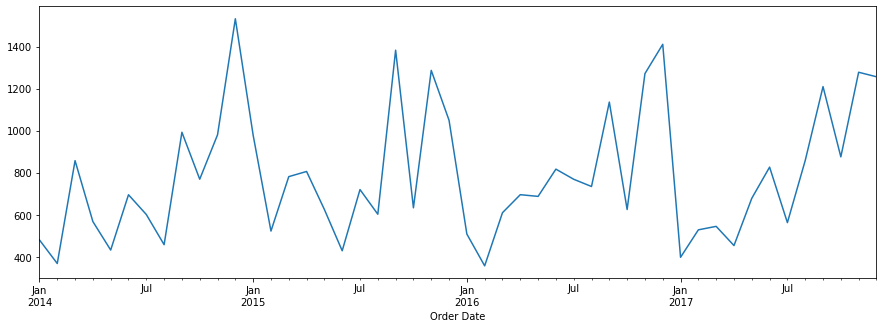

In [16]:
# Independence Tests -> Profit was dependent on DISCOUNT and SALES 
# Univariate variable for TSA -> make sure that it's an independent variable
# We preferred SALES over PROFIT 
# For BULK data -> always do an independence test 
# Profit = y = f(Sales, Discount) <- Profit was dependent 
# Sales -> y = f(order_items ) 
plt.figure()
y.plot(figsize=(15,5))
plt.show()


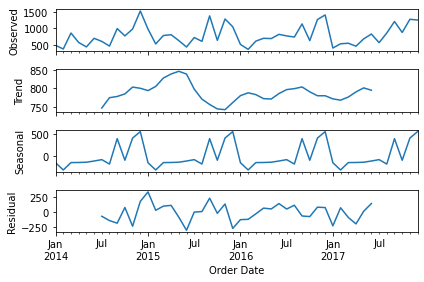

In [17]:
# Eigenvectors and EigenValues -> 
# Vectors on which any linear transformation is applied -> and doesn't change its direction
# SUCH a vector is called Eigenvector, and its value is Eigenvalue 
# https://www.mathsisfun.com/algebra/eigenvalue.html 

# OLD Algo for TS: https://orangematter.solarwinds.com/2019/12/15/holt-winters-forecasting-simplified/
# SEASONS could impact your data 
# EXTERNAL factors -> Marketing or promotion or discounts that could manipulate your predictions

# SARIMAX -> SEASONAL ARIMA EXTREME 
# SEASONS -> PERIODS or PATTERNS that repeat w.r.t. TIME 
# TREND -> whether the overall data was increasing or decreasing (slope, dy/dx )
# RESIDUE or NOISE -> Whatever is left 
# INSTEAD of making prediction on original data 
# We decompose the GRAPH into Seasons, TRENDS, RESIDUE 
# each of them is predicted separately, and then composed to get final prediction 
# AR I MA -> Auto-Regression, Integrated seasons, Moving Averages 
# we will apply all 3 algorithms to SEASONS (season present or season absent), trend, residue
# 
# MOVING AVERAGES
#time windows keep on shifting , so that history has slowly LESSER impact on future
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

fig = decomposition.plot()
plt.show() 
# INITIAL 5 points are IGNORED so that trend calculation can be done
# TREND needs a history! 
# 3 and 5 are your magic numbers 
# THESE ARE WINDOWS of time periods 

2 algorithms to build these truth tables:

1) EXHAUSTIVE -> ALL COMBINATIONS (entire truth table will be created)

- SLOWER

-> GRID SEARCH 

2) Not the best, but workable answer (randomly truth will be created)

- FASTER 

-> RANDOM SEARCH 

https://towardsdatascience.com/random-search-vs-grid-search-for-hyperparameter-optimization-345e1422899d


Can be used to find best combination(s) of algo comparison, parameters, hyperparameters, metrics or wherever TOO many are present and we could select a few of them! 

In [18]:
# in AR I MA -> p,d,q 
p = d = q = range(0,2) # VALUE generators between [0,1] 
pdq = list(itertools.product(p,d,q))
print(pdq)



[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [19]:
# SEASONS -> manipulated manually -> at what point should I expect repeatation?
# YEARs -> our repeatation is ANNUAL in nature 
seasons = 12 # my data granularity is monthly -> so to take 1 year as a SEASON, i have to take
# 12 months 
# LIST COMPREHENSION -> (0,0,0) -> (0,0,0,12)
seasonal_pdq = [   (x[0],x[1],x[2], seasons)  for x in pdq] # if x was (0,1,0), -> (0,1,0,12)
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[0]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[1]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[2]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[3]))
# here is an INDIVIDUAL MODEL -> WITH and WITHOUT SEASON 
# ALL SUCH PERMUTATIONS WILL BE EXHAUSTIVELY CREATED!!! 
# EVERY POSSIBLE COMBINATION HAS BEEN CREATED! 
# AN SARIMAX -> SEASONAL ARIMA EXHAUSTIVE 
# ALL possible algos with (seasonal_pdq) and without season (pdq)
# 

SARIMAX individual MODEL = (1, 0, 1) X (0, 0, 0, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 0, 1, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 1, 0, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 1, 1, 12)


In [20]:
# HOW DO WE DECIDE IF ONE MODEL IS BETTER THAN THE OTHER MODEL?
# METRICS -> ACCURACY, PRecision, Recall, F1 score, MAE, MSE....
# AKAIKE INFORMATION CRITERION (for a while now, this is a PROBABILISTIC formula to calculate
# error in liklihood/probability calculation)
# AIC = 2k - 2 ln (L) 
# L -> maximum Liklihood of the model's correctness (same formula as in RMSE,STD 
# etc, but converted into Probaility of correctness rather than actual number)
# k -> no. of samples being considered 
# for AIC, MINIMUM value is preferred 
# AIC is LOSS CALCULATION -> hence more loss = bad model
# 
# we will end up with a LOT of IMPOSSIBLE/Imaginary/Complex/Divby0/Errors models
# LOT of these models may not even make sense, and will throw exceptions!
# EXCEPTION handling is MUST  
min_pdq = (999,999,999)
min_spdq = (999,999,999,12)
min_AIC = 999
for param in pdq:
  for sparam in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=sparam, enforce_stationarity=False)
      predictions = model.fit()
      print('Model={}X{}. AIC= {}'.format(param, sparam, predictions.aic))
      if(predictions.aic < min_AIC):
        min_pdq = param
        min_spdq = sparam
        min_AIC = predictions.aic
    except Exception as e:
      print(e)
      continue

print('**** Smallest PDQ,SPDQ is *****')
print(min_AIC)
print(min_pdq)
print(min_spdq)

# Somebody said, that because sky is blue, you remain ANGRY
# the only way to prove or disprove this
# be angry in presence of blue sky, and in its absence
# EXHAUSTIVE comparison! angry, no angry -> when sky is BLUE, GREEN, PINK 
# and at the same time in ABSENCE of sky also -> to calculate if there was any impact of 
# sky at all! 


Model=(0, 0, 0)X(0, 0, 0, 12). AIC= 769.0817523205916
Model=(0, 0, 0)X(0, 0, 1, 12). AIC= 548.1772347587046
Model=(0, 0, 0)X(0, 1, 0, 12). AIC= 477.71701309202774
maxlag should be < nobs
Model=(0, 0, 0)X(1, 0, 0, 12). AIC= 497.2314433418337
Model=(0, 0, 0)X(1, 0, 1, 12). AIC= 478.3653805749645
Model=(0, 0, 0)X(1, 1, 0, 12). AIC= 318.0047199116341
maxlag should be < nobs
Model=(0, 0, 1)X(0, 0, 0, 12). AIC= 720.9252270739973
Model=(0, 0, 1)X(0, 0, 1, 12). AIC= 514.7587049639892
Model=(0, 0, 1)X(0, 1, 0, 12). AIC= 466.5556513479083
maxlag should be < nobs
Model=(0, 0, 1)X(1, 0, 0, 12). AIC= 498.8314925544705
Model=(0, 0, 1)X(1, 0, 1, 12). AIC= 467.1039211192387
Model=(0, 0, 1)X(1, 1, 0, 12). AIC= 319.9884876946219
maxlag should be < nobs
Model=(0, 1, 0)X(0, 0, 0, 12). AIC= 677.894766859465
Model=(0, 1, 0)X(0, 0, 1, 12). AIC= 488.7012043020711
Model=(0, 1, 0)X(0, 1, 0, 12). AIC= 486.63785671879367
maxlag should be < nobs
Model=(0, 1, 0)X(1, 0, 0, 12). AIC= 497.78896630044073
Model=(0, 1, 0

In [21]:
model = sm.tsa.statespace.SARIMAX(y, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
# (0, 1, 0)X(1, 0, 1, 12)
model2 = sm.tsa.statespace.SARIMAX(y, order=(0, 1, 0), seasonal_order= (1, 0, 1, 12), enforce_stationarity=False)
results = model.fit()
results2 = model2.fit()
# we've taken 2 models so that we can compare their predictions 
results.summary() #.tables[1]  # AIC => needs to be lowest 
# results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -145.301
Date:                            Thu, 07 Apr 2022   AIC                            298.602
Time:                                    11:59:11   BIC                            302.966
Sample:                                01-01-2014   HQIC                           299.630
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1280      0.276      0.464      0.643      -0.412       0.669
ma.L1         -0.9998      0.450     -2.223      0.026      -1.881      -0.118
ar.S.L12      -0.2811      0.154     -1.826      0.068      -0.583       0.021
sigma2      3.028e+04   1.49e-05   2.04e+09      0.000    3.03e+04    3.03e+04
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.77
Prob(Q):                               nan   Prob(JB):                         0.68
Heteroskedasticity (H):               0.67   Skew:                            -0.22
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.69e+24. Standard errors may be unstable.
"""

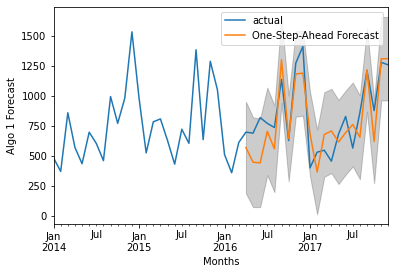

In [22]:
# let's check the actual predictions and plot them 

pred = results.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=False)
pred_ci = pred.conf_int()
pred2 = results2.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred2_ci = pred2.conf_int()
ax = y['2014':].plot(label='actual') # ACTUAL DATA PLOT
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
# there is always a tolerance or error kernel(region) surrounding the forecast
# +- region within which mistakes are acceptable 
# THIS TOLERANCE REGION is also called CONFIDENCE INTERVAL 
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
# BASE LINE-> index, lower confidence limit, upper confidence limit
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show() 



In [23]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [24]:
pred.predicted_mean

Order Date
2016-04-01     567.152715
2016-05-01     444.554612
2016-06-01     439.072907
2016-07-01     702.201164
2016-08-01     556.369830
2016-09-01    1299.350271
2016-10-01     641.307925
2016-11-01    1180.762725
2016-12-01    1187.915335
2017-01-01     680.279193
2017-02-01     363.014963
2017-03-01     675.598709
2017-04-01     705.483431
2017-05-01     613.405403
2017-06-01     691.091194
2017-07-01     759.559749
2017-08-01     652.096670
2017-09-01    1215.246847
2017-10-01     616.776917
2017-11-01    1307.832541
2017-12-01    1308.570910
Freq: MS, dtype: float64

In [25]:
pred_ci

,lower Sales,upper Sales
Order Date,,
2016-04-01,184.592795,949.712635
2016-05-01,70.144068,818.965156
2016-06-01,70.133941,808.011873
2016-07-01,337.190742,1067.211586
2016-08-01,194.317446,918.422215
2016-09-01,939.605720,1659.094821
2016-10-01,283.414263,999.201588
2016-11-01,824.386547,1537.138903
2016-12-01,832.805912,1543.024759


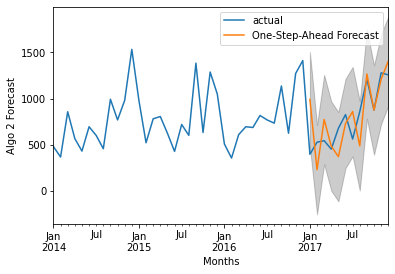

In [26]:
plt.figure()
bx = y['2014':].plot(label='actual') # ACTUAL DATA PLOT
pred2.predicted_mean.plot(ax=bx, label='One-Step-Ahead Forecast')
# there is always a tolerance or error kernel(region) surrounding the forecast
# +- region within which mistakes are acceptable 
# THIS TOLERANCE REGION is also called CONFIDENCE INTERVAL 
bx.fill_between(pred2_ci.index, pred2_ci.iloc[:,0], pred2_ci.iloc[:,1], color='k', alpha=0.2)
# BASE LINE-> index, lower confidence limit, upper confidence limit
bx.set_xlabel('Months')
bx.set_ylabel('Algo 2 Forecast')
plt.legend()
plt.show() 

### p: AR. The number of lag observations included in the model also called the lag order.
### d: I. The number of times that the raw observations are differenced, also called the degree of difference.
### q: MA. The size of the moving average window is also called the order of moving average.
### ARIMA(p, q, d) is a linear regression model on previous p values and previous q errors post differencing d times
### The “s” in SARIMA stands for seasonal.so,the ARIMA model is either seasonal, in which case it is a SARIMA model, or non-seasonal, in which case it is an ARIMA model.
### it can be any period of time in which the data seems to be repetitive

In [27]:
# When we are building truth tables, while calculating loss on it, 
# we can end up with div by 0 situations and other exceptions also

# DERIVATES and PARTIAL DERIVATIVES 
# https://www.mathsisfun.com/calculus/derivatives-introduction.html 
# https://www.mathsisfun.com/calculus/derivatives-partial.html 

